In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, multinomial

In [96]:
N = int(5e1) # half-number of photons
NN = 2*N # total-number of photons
P1H = 1/np.sqrt(2)
P2H = 1 - P1H
P1V = (3*np.sqrt(2) - 4)/2
P2V = (2-np.sqrt(2))/2
P3V = 1 - P1V - P2V

In [97]:
V = multinomial(N, [P1V,P2V,P3V])
H1 = binom( N , P1H )

In [98]:
def output_photon_distribution(n1, n2):
    
    p = 0
    for h1 in range(N+1):
        p += H1.pmf(h1)*V.pmf([n1-h1, h1+n2-N , NN - n1 - n2])
    return p

In [99]:
n = np.arange(N)
N1, N2 = np.meshgrid(n, n)

photon_dist = np.zeros((N,N))
for n1 in n:
    for n2 in n:
        photon_dist[n1, n2] = output_photon_distribution(n1, n2)

In [ ]:
np.save("data/output_pmf/pmf_N{:d}_box{}.npy".format(2*N, box))

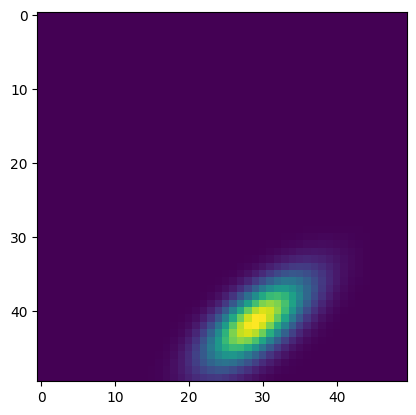

In [108]:
plt.imshow(photon_dist)
plt.show()